# Sentiment Analysis - Logistic Regression - Israel Chaparro

Adapted from http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/outofcore_modelpersistence.ipynb

## 1. The IMDb Movie Review Dataset

In this section, we will train a simple logistic regression model to classify movie reviews from the 50k IMDb review dataset that has been collected by Maas et. al.

> AL Maas, RE Daly, PT Pham, D Huang, AY Ng, and C Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Lin- guistics: Human Language Technologies, pages 142–150, Portland, Oregon, USA, June 2011. Association for Computational Linguistics

[Source: http://ai.stanford.edu/~amaas/data/sentiment/]

The dataset consists of 50,000 movie reviews from the original "train" and "test" subdirectories. The class labels are binary (1=positive and 0=negative) and contain 25,000 positive and 25,000 negative movie reviews, respectively.
For simplicity, I assembled the reviews in a single CSV file.

In [1]:
import pandas as pd
df = pd.read_csv('shuffled_movie_data.csv') #too big for upload to github :(
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


In [2]:
df['sentiment'].describe()

count    50000.000000
mean         0.500000
std          0.500005
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

In [3]:
import numpy as np
from sklearn import metrics
## uncomment these lines if you have dowloaded the original file:
#np.random.seed(0)
#df = df.reindex(np.random.permutation(df.index))
#df[['review', 'sentiment']].to_csv('shuffled_movie_data.csv', index=False)

## 2. Preprocessing Text Data

Now, let us define a simple `tokenizer` that splits the text into individual word tokens. Furthermore, we will use some simple regular expression to remove HTML markup and all non-letter characters but "emoticons," convert the text to lower case, remove stopwords, and apply the Porter stemming algorithm to convert the words into their root form.

In [4]:
import numpy as np
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
pronouns12=stop[:17]
stop=stop[17:]
#porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    #emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower())# + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    #tokenized = [porter.stem(w) for w in text]
    return text

Let's give it at try:

In [5]:
tokenizer('This :) is a <a> test of all algorithms in the world for me! :-)</br>')

['test', 'algorithms', 'world', 'me']

*** WARNING ***
The next code is for recalculate the features, there are commented and in the next cell we import directly the calculated features. You can recalculate the features changing the type of the next cell to "CODE".
The features used are like https://web.stanford.edu/~jurafsky/slp3/5.pdf Part: 5.1.1

In [6]:
## Impoting Features
from numpy import genfromtxt
features = genfromtxt('https://raw.githubusercontent.com/ichaparroc/IMDb-Movie-Review/master/features.csv', delimiter=',')
target = genfromtxt('https://raw.githubusercontent.com/ichaparroc/IMDb-Movie-Review/master/target.csv', delimiter=',')
target = np.reshape(target,(target.shape[0],1))
features = np.column_stack((np.ones(features.shape[0]),features))
print features
print features.shape
print target.shape
print target

[[ 1.          8.         14.         ...  1.          0.
   4.8598124 ]
 [ 1.         13.         10.         ... 15.          1.
   4.8598124 ]
 [ 1.         14.         21.         ...  6.          1.
   5.04985601]
 ...
 [ 1.          2.          4.         ...  4.          1.
   4.2341065 ]
 [ 1.          4.          3.         ...  0.          0.
   3.91202301]
 [ 1.          4.          1.         ...  4.          0.
   3.25809654]]
(50000, 7)
(50000, 1)
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


## 3. Splitting Data

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 7)
(10000, 7)
(40000, 1)
(10000, 1)


## 4. Logistic Regression

In [8]:
train_accuracy=[]
test_accuracy=[]
alpha=0.0000000001
theta=np.random.rand(1,X_train.shape[1])#/X_train.shape[0]
max_epoch=50000000
for epoch in range(max_epoch):
    hx_train=(1.0/(1.0+np.exp(-np.matmul(theta,np.transpose(X_train)))))
    error=np.transpose(y_train)-hx_train
    np.around(y_train)
    dtheta=np.matmul(error,X_train)
    theta+=alpha*dtheta#/X_train.shape[0]
    if epoch%10000==0:
        hx_test=(1.0/(1.0+np.exp(-np.matmul(theta,np.transpose(X_test)))))
        train_accuracy.append((X_train.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_train)-hx_train))))/X_train.shape[0])
        test_accuracy.append((X_test.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_test)-hx_test))))/X_test.shape[0])
        print ((X_train.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_train)-hx_train))))/X_train.shape[0],(X_test.shape[0]-np.sum(np.absolute(np.around(np.transpose(y_test)-hx_test))))/X_test.shape[0])

(0.49755, 0.5098)
(0.49755, 0.5098)
(0.49755, 0.5098)
(0.541375, 0.5504)
(0.657025, 0.6546)
(0.680325, 0.6779)
(0.686375, 0.6851)
(0.689525, 0.6901)
(0.692675, 0.6932)
(0.695725, 0.6945)
(0.69765, 0.6948)
(0.699625, 0.6969)
(0.7015, 0.6993)
(0.703275, 0.7025)
(0.70435, 0.703)
(0.705425, 0.7033)
(0.7063, 0.7044)
(0.70695, 0.7053)
(0.707525, 0.7058)
(0.709025, 0.7058)
(0.71025, 0.7073)
(0.711425, 0.7089)
(0.711975, 0.7096)
(0.713025, 0.7108)
(0.71395, 0.7117)
(0.714475, 0.7124)
(0.71515, 0.7123)
(0.7159, 0.7124)
(0.716425, 0.7132)
(0.7171, 0.7138)
(0.71785, 0.7147)
(0.718575, 0.7148)
(0.719725, 0.7157)
(0.72005, 0.7163)
(0.72045, 0.7168)
(0.721, 0.7172)
(0.7212, 0.7178)
(0.721775, 0.7183)
(0.7222, 0.7183)
(0.722225, 0.7192)
(0.722875, 0.7192)
(0.723175, 0.7197)
(0.723725, 0.7202)
(0.72445, 0.7213)
(0.724825, 0.7219)
(0.725025, 0.7229)
(0.72545, 0.7235)
(0.7263, 0.7246)
(0.726575, 0.7243)
(0.72705, 0.725)
(0.72735, 0.7253)
(0.727425, 0.7252)
(0.7273, 0.7255)
(0.727175, 0.7262)
(0.72775, 0

(0.731725, 0.7327)
(0.7317, 0.7327)
(0.731725, 0.7326)
(0.731725, 0.7325)
(0.73175, 0.7326)
(0.731775, 0.7327)
(0.731775, 0.7328)
(0.731775, 0.7328)
(0.731775, 0.7328)
(0.731775, 0.7328)
(0.731775, 0.7328)
(0.731775, 0.7328)
(0.731875, 0.7328)
(0.731875, 0.7328)
(0.731925, 0.7328)
(0.731925, 0.7328)
(0.731925, 0.7328)
(0.7319, 0.7327)
(0.7319, 0.7326)
(0.7319, 0.7327)
(0.7319, 0.7327)
(0.73195, 0.7327)
(0.73195, 0.7326)
(0.73195, 0.7326)
(0.73195, 0.7326)
(0.73195, 0.7326)
(0.731925, 0.7327)
(0.73195, 0.7327)
(0.731975, 0.7327)
(0.731975, 0.7327)
(0.731975, 0.7327)
(0.731975, 0.7327)
(0.731975, 0.7327)
(0.731975, 0.7327)
(0.7319, 0.7327)
(0.7319, 0.7327)
(0.731925, 0.7327)
(0.7319, 0.7327)
(0.7319, 0.7326)
(0.7319, 0.7326)
(0.7319, 0.7326)
(0.7319, 0.7326)
(0.7319, 0.7325)
(0.7319, 0.7325)
(0.7319, 0.7325)
(0.731875, 0.7325)
(0.7319, 0.7325)
(0.7319, 0.7326)
(0.7319, 0.7326)
(0.7319, 0.7326)
(0.7319, 0.7325)
(0.7319, 0.7325)
(0.731925, 0.7325)
(0.731925, 0.7327)
(0.731925, 0.7327)
(0.7

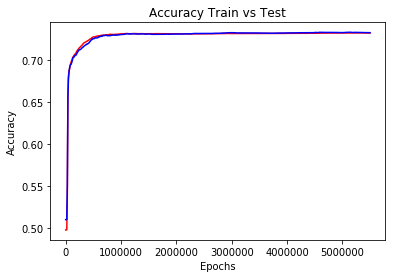

In [9]:
#train_accuracy = genfromtxt('https://raw.githubusercontent.com/ichaparroc/IMDb-Movie-Review/master/temp_train.txt', delimiter=',')
#test_accuracy = genfromtxt('https://raw.githubusercontent.com/ichaparroc/IMDb-Movie-Review/master/temp_test.txt', delimiter=',')
import matplotlib.pyplot as plt
temp_series=np.linspace(1,5500000,num=550)
plt.plot(temp_series, train_accuracy, color='red')
plt.plot(temp_series, test_accuracy, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Train vs Test')
plt.show()